# INTRODUCTION
* I want to share with you a situation that draws my attention about exploratory data analysis(EDA).
* When I look at exploratory data analysis I observe that most of the plots or graphs are ordinary like bar plots, heat maps for correlation and maps.
* Although I like reading different kernels and exploring varied datasets, same visualization plots are boring for me and they do not improve me.
* On the other hand, in order to make better visualization, you need to improve and fill with more visualization technique your graphic repository. 
* Therefore, I make tutorial about rare visualization techniques. Some of the plots or graphs can be familiar for you but as much as I can, I will try to visualize different graphics.
* Python is open source and diffent libraries can be used. Lets look at which visualization libraries we will use.
<br>
<br>
* [Matrix and Box Plots (Missingno)](#1)
* [Parallel Plots (Pandas)](#2)
* [Network Charts (Networkx)](#3)
* [Venn (Matplotlib)](#4)
* [Spider Chart (Matplotlib)](#5) 
* [Cluster Map (Seaborn)](#6) 
* [Inset Plots (Plotly)](#7) 
* [Basic 3D Scatter Plot (Plotly)](#8) 
<br>
<br>

In [1]:
import numpy as np # For linear algebra operations
import pandas as pd # For data processing, reading/writing CSV files
import matplotlib.pyplot as plt # For plotting
import seaborn as sns # For data visualization
import matplotlib_venn as venn # For Venn diagrams
from math import pi # For mathematical operations
from pandas.plotting import parallel_coordinates # For parallel coordinates plotting
import plotly.graph_objs as go # For Plotly graph objects
from plotly.offline import init_notebook_mode, iplot # For Plotly offline mode
import warnings # For controlling warnings
import os # For operating system operations

# Ignore warnings
warnings.filterwarnings("ignore")

# Start Plotly offline mode
init_notebook_mode(connected=True)

# List input data files (update the file path according to your own structure)
print(os.listdir("../input"))

# You can save any results you write to the current directory as output.

['iris']


<a id="1"></a> <br>
## Matrix and Bar Plots (Missingno)
* In data analysis, one of the first steps is cleaning messy datasets and missing values.
* In order to explore whether data has missign value or not, I always use .info() method from pandas library. It gives a lot of information.
* Visualization is always attractive for people. Therefore, if we can visualize missign values, it can be better understandable.
* In order to visualize missign data, we can use missigno package.
* Lets create pandas dataframe that includes missign values (NaN) and visualize it.
    * Dictionary: One of the methods of creating data frame is first creating dictionary then put it into pd.DataFrame
    * data_missingno: Data frame that we will use in this example
    * import missingno as msno: import missingno library and define as msno (shortcut)
    * matrix(): Create matrix. Number of rows is number of sample and number of columns is number of features(column1, column2, column3) in data_missingno.
    * show(): shows the plot
* The sparkline at right summarizes the general shape of the data completeness and points out the maximum and minimum rows.
* Missign values are white and non missign values are black in plot.
* It can be seen from plot column1 does not have missign value. Column2 has five missign values and column3 has three missign values.

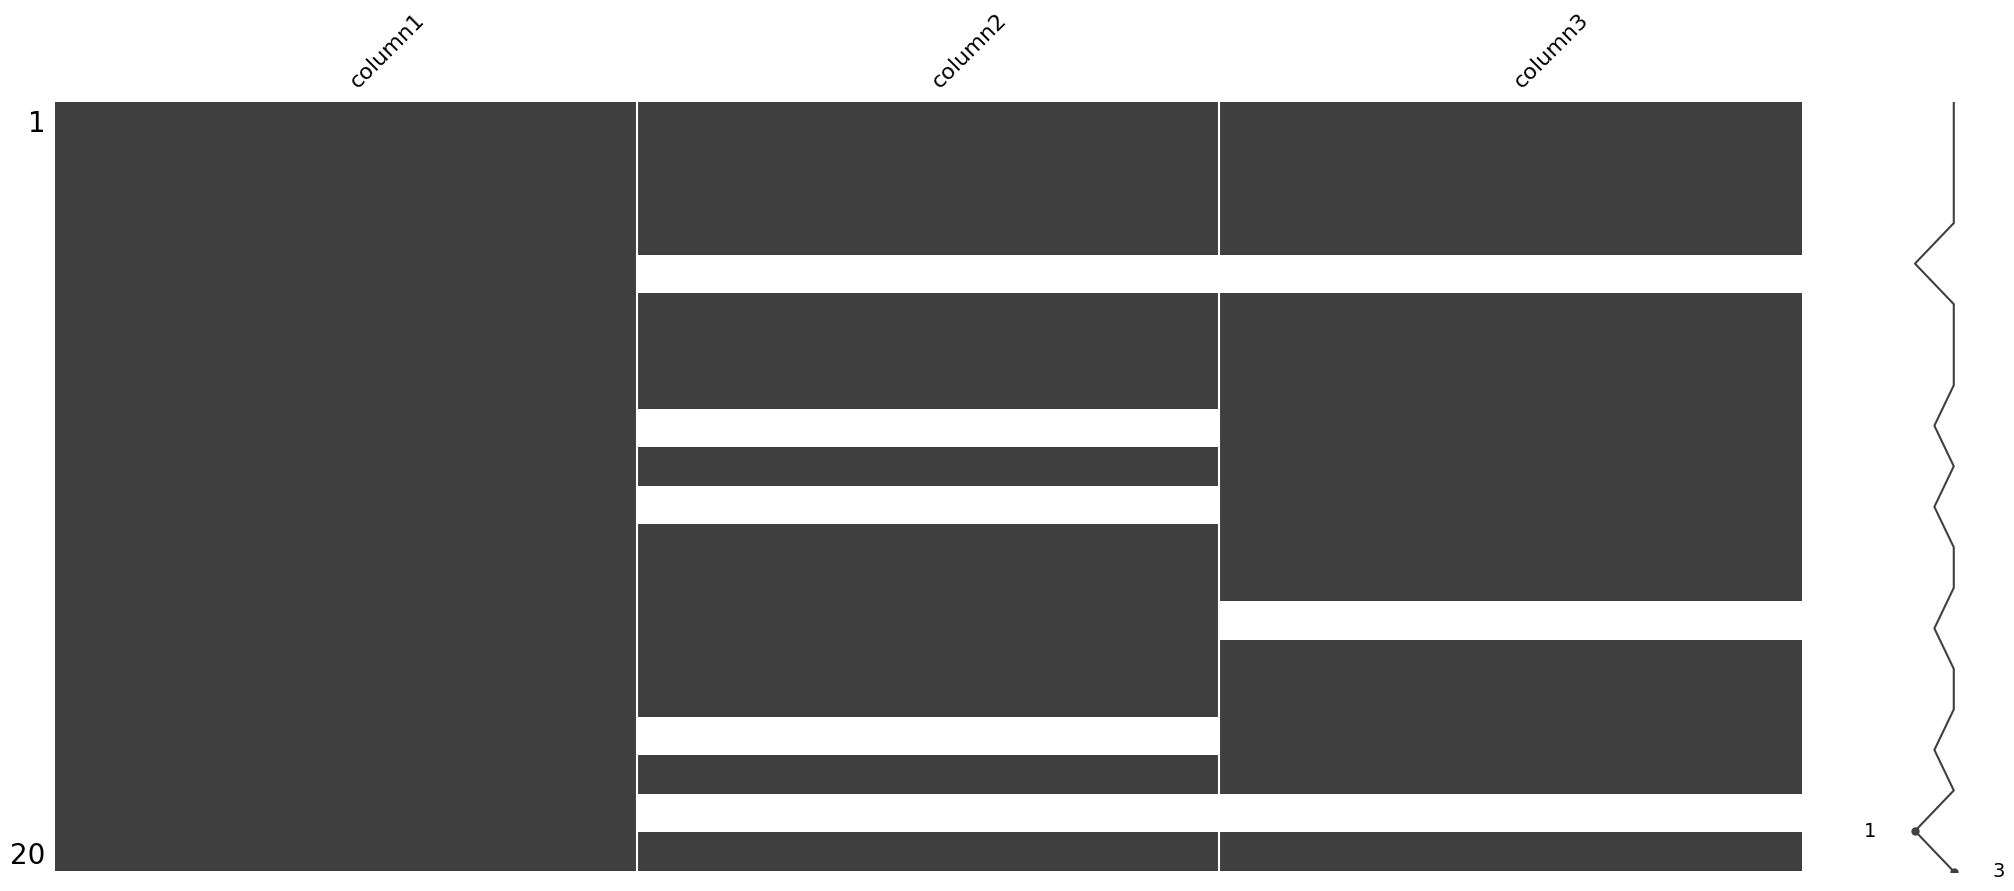

In [2]:
# Define dictionary
dictionary = {"column1":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
              "column2":[1,2,3,4,np.nan,6,7,8,np.nan,10,np.nan,12,13,14,15,16,np.nan,18,np.nan,20],
              "column3":[1,2,3,4,np.nan,6,7,8,9,10,11,12,13,np.nan,15,16,17,18,np.nan,20]}
# Create data frame from dictionary
data_missingno = pd.DataFrame(dictionary) 

# import missingno library
import missingno as msno
msno.matrix(data_missingno)
plt.show()

* Apart from matrix plot we can use bar plot to observe missign values.
* Bar is a simple visualization of nullity by column.
* Numbers at left side of plot is percentage.
* Numbers at top of the plot is number of non missign values
* Numbers at right side of plot is number of sample in data.

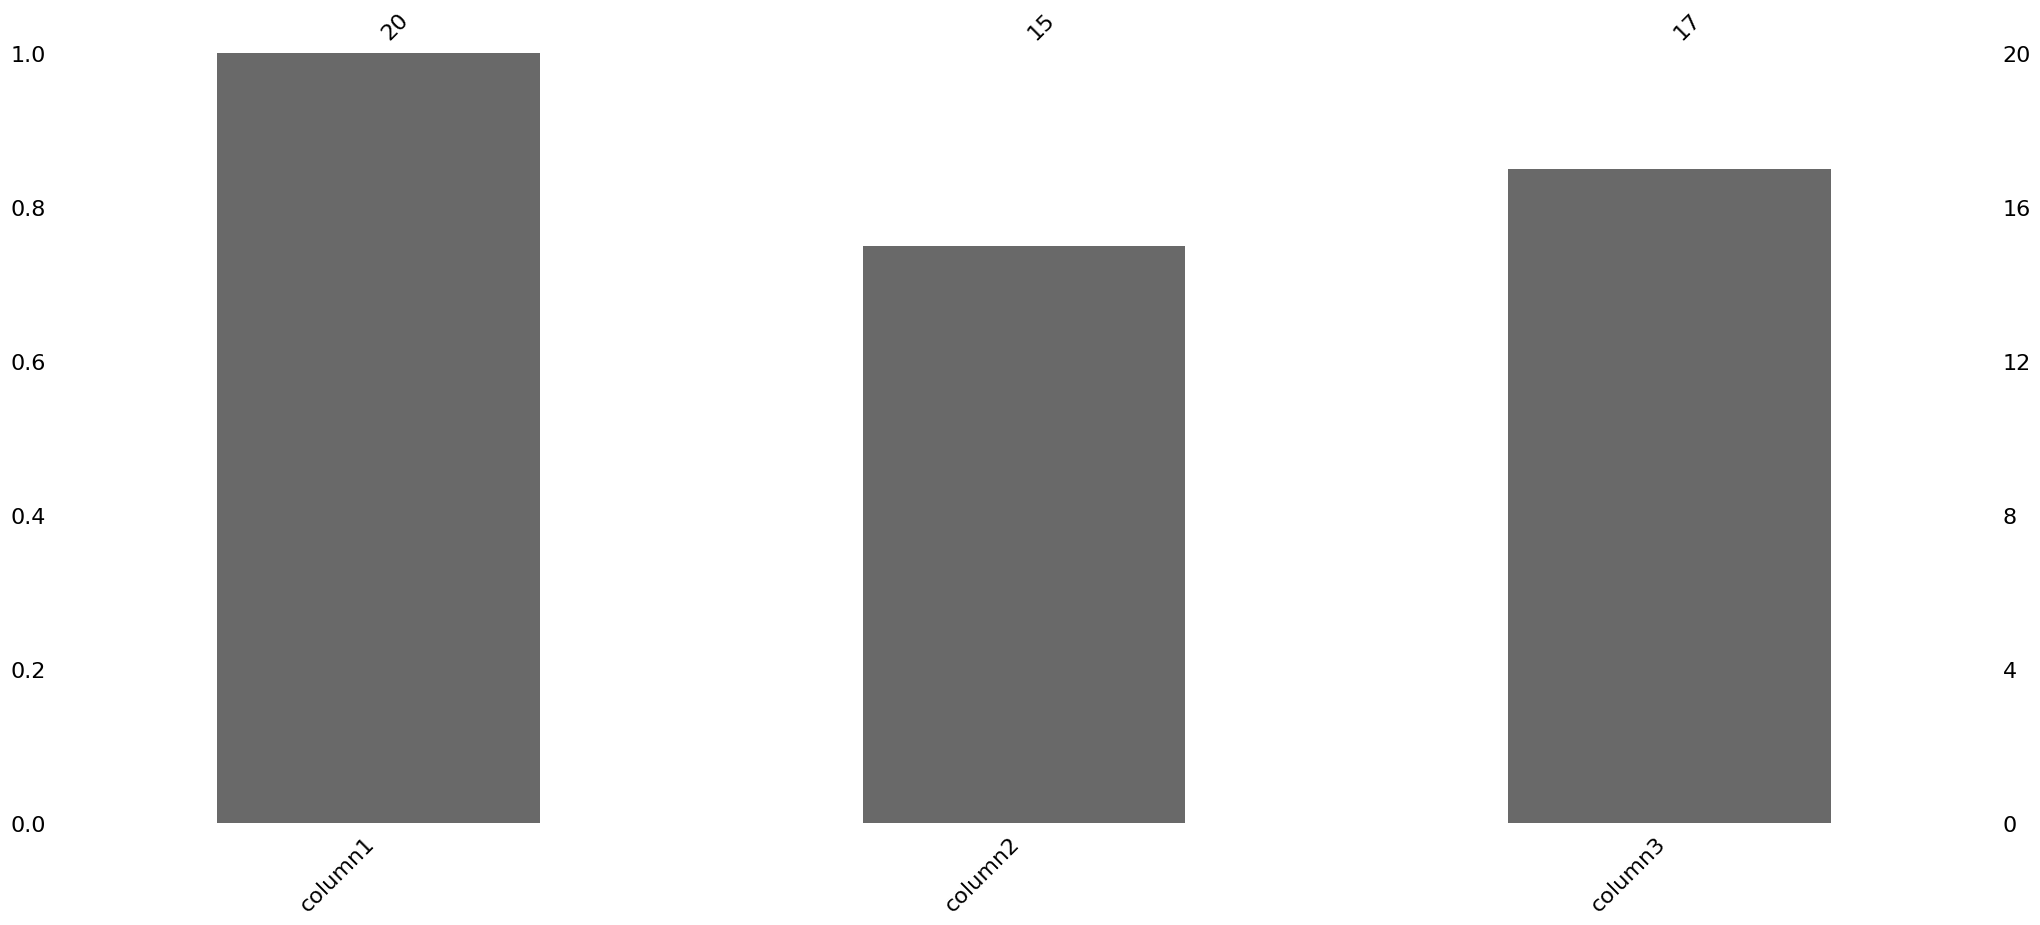

In [3]:
# missingno bar plot
msno.bar(data_missingno)
plt.show()

<a id="2"></a> <br>
## Parallel Plots (Pandas)
* In order to learn parallel plots, we will use famous iris data set from sklearn library
* Parallel plot allow to compare the feature of several individual observations on a set of numerical variables.
* Each vertical bar represents a feature(column or variable) like petal length (cm).
* Values are then plotted as series of lines connected across each axis.
* Different colors shows different classes like setosa.
* Parallel plot allow to detect interesting patterns. For example as you can see we can easily classify *setosa* according to *petal width (cm)* feature.
* Lets look at code.
    * Load iris data into data frame
    * parallel_coordinates: we import parallel_coordinates from pandas library
    * colormap: color map that paints classes with different colors

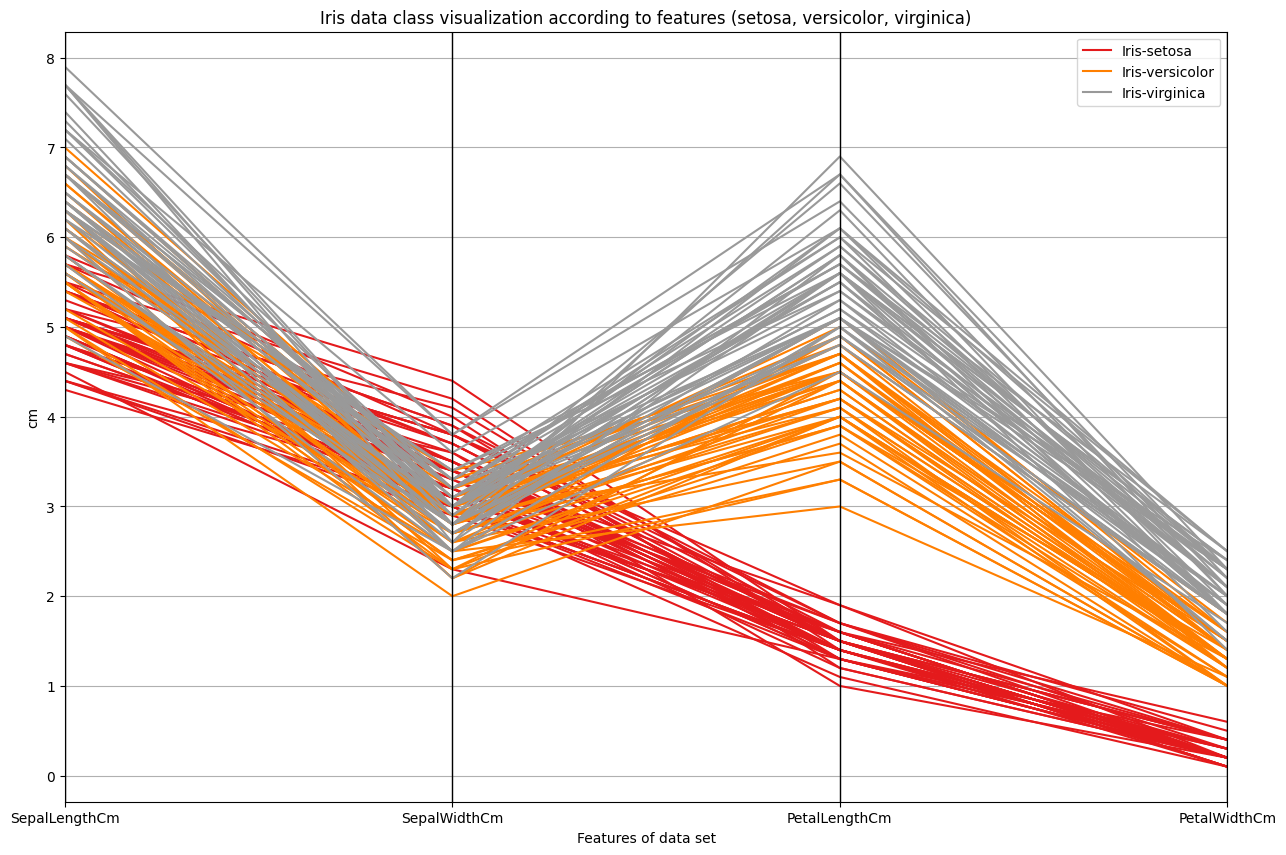

In [4]:
# load iris data
data = pd.read_csv("/kaggle/input/iris/Iris.csv")
data = data.drop(['Id'],axis=1)
# Make the plot
plt.figure(figsize=(15,10))
parallel_coordinates(data, 'Species', colormap=plt.get_cmap("Set1"))
plt.title("Iris data class visualization according to features (setosa, versicolor, virginica)")
plt.xlabel("Features of data set")
plt.ylabel("cm")
plt.savefig('graph.png')
plt.show()

<a id="3"></a> <br>
## Network Charts (Networkx)
* We will use iris data that we import at previous part( parallel plot)
* Network charts are related with correlation network.
* It can be used instead of heatmaps in seaborn library.
* At first look at correlation between features.
    * corr(): gives correlation between features
    * As you can see from table below, petal length is positively correlated with sepal length and petal width. Also, petal length is negatively correlated with sepal width.

In [5]:
# Calculate the correlation between individuals
corr = data.iloc[:,0:4].corr()
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


* We have 4 individuals(features), and know how close they are related to each other (above correlation table).
* It is possible to represent these relationships in a network
* Each individual called as a node. If 2 individuals(features like sepal length and sepal width) are close enough (threshold), then they are linked by a line.
    * threshold: threshold of the correlation. For example, if we say that threshold = 0.5, network will be established between the nodes that have higher correlation than 0.5
* I will put -1 that is default threshold value. min(cor(A,B))= -1 so all nodes are connected with each other.
* You can try threshold = 0.9, you will see that petal length and width are connected with each other.
* It is alternative to heatmap.
* As a final words of network charts, they can be used in data sets that are related with populations and their habits. Maybe,we can observe populations are clearly split in X groups according to their habits.
* Now lets look at our code with iris datasets.

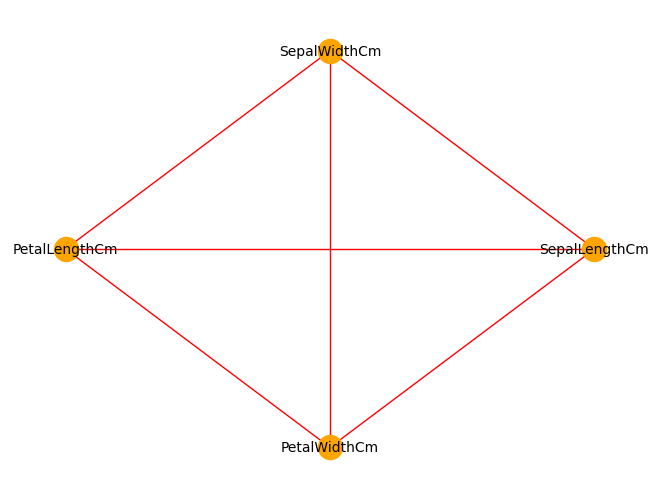

In [6]:
# import networkx library
import networkx as nx

# Transform it in a links data frame (3 columns only):
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']

# correlation
threshold = -1

# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered=links.loc[ (links['value'] >= threshold ) & (links['var1'] != links['var2']) ]
 
# Build your graph
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
 
# Plot the network
nx.draw_circular(G, with_labels=True, node_color='orange', node_size=300, edge_color='red', linewidths=1, font_size=10)


<a id="4"></a> <br>
## Venn (Matplotlib)
* You can use venn diagram to visualize the size of groups and their intersection.

In [7]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


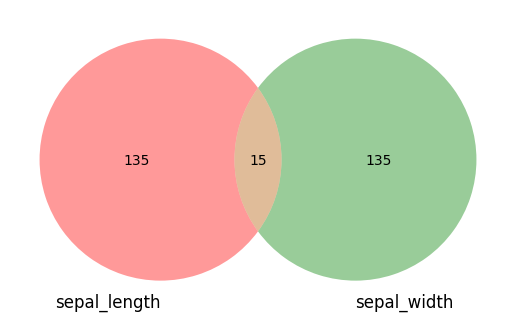

In [8]:
# venn2
from matplotlib_venn import venn2
sepal_length = data.iloc[:,0]
sepal_width = data.iloc[:,1]
petal_legth = data.iloc[:,2]
petal_width = data.iloc[:,3]
# First way to call the 2 group Venn diagram
venn2(subsets = (len(sepal_length)-15, len(sepal_width)-15, 15), set_labels = ('sepal_length', 'sepal_width'))
plt.show()

 <a id="5"></a> <br>
## Spider Chart (Matplotlib)
* A spider(radar) plot  is a graphical method of displaying multivariate data in the form of a two-dimensional chart of three or more quantitative variables.

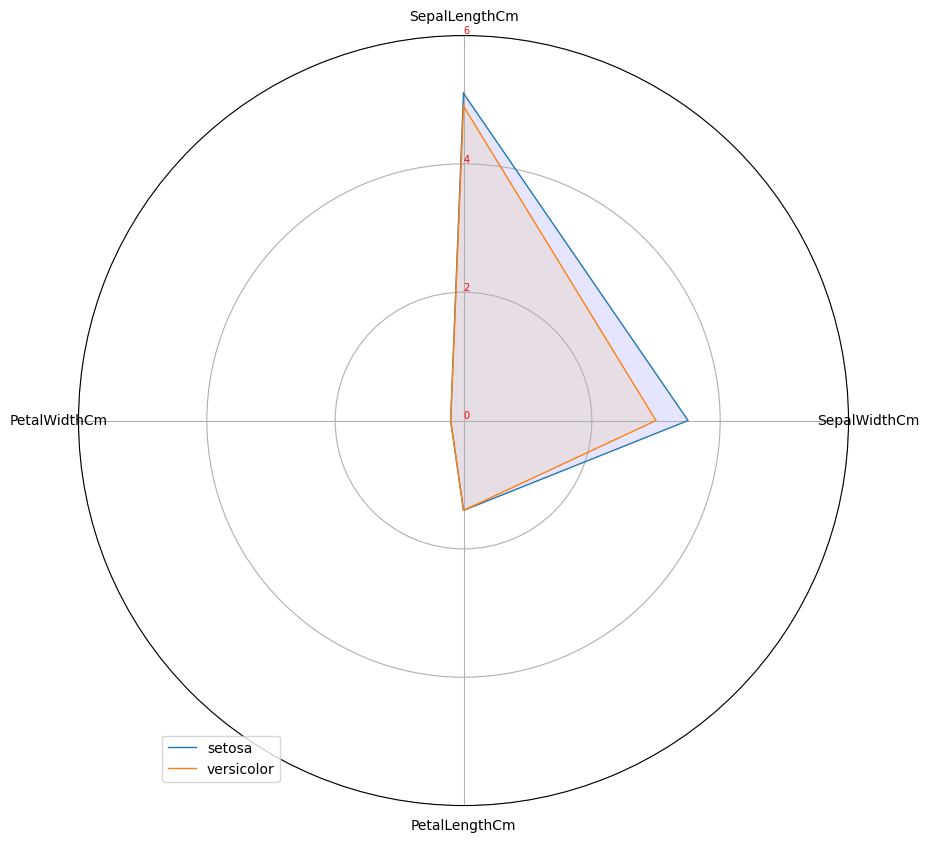

In [9]:
# spider graph
categories = list(data)[:4]
N = len(categories)
angles = [ n / float(N)*2*pi for n in range(N)]
angles = angles + angles[:1]
plt.figure(figsize = (10,10))
ax = plt.subplot(111,polar = True)
ax.set_theta_offset(pi/2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1],categories)
ax.set_rlabel_position(0)
plt.yticks([0,2,4,6],["0","2","4","6"],color= "red", size = 7)
plt.ylim(0,6)

values = data.loc[0].drop("Species").values.flatten().tolist()
values = values + values[:1]
ax.plot(angles,values,linewidth = 1,linestyle="solid",label ="setosa" )
ax.fill(angles,values,"b",alpha=0.1)

values = data.loc[1].drop("Species").values.flatten().tolist()
values = values + values[:1]
ax.plot(angles,values,linewidth = 1,linestyle="solid",label ="versicolor" )
ax.fill(angles,values,"orange",alpha=0.1)
plt.legend(loc = "upper left",bbox_to_anchor = (0.1,0.1))
plt.show()

<a id="6"></a> <br>
## Cluster Map (Seaborn)
* Plot a matrix dataset as a hierarchically-clustered heatmap.

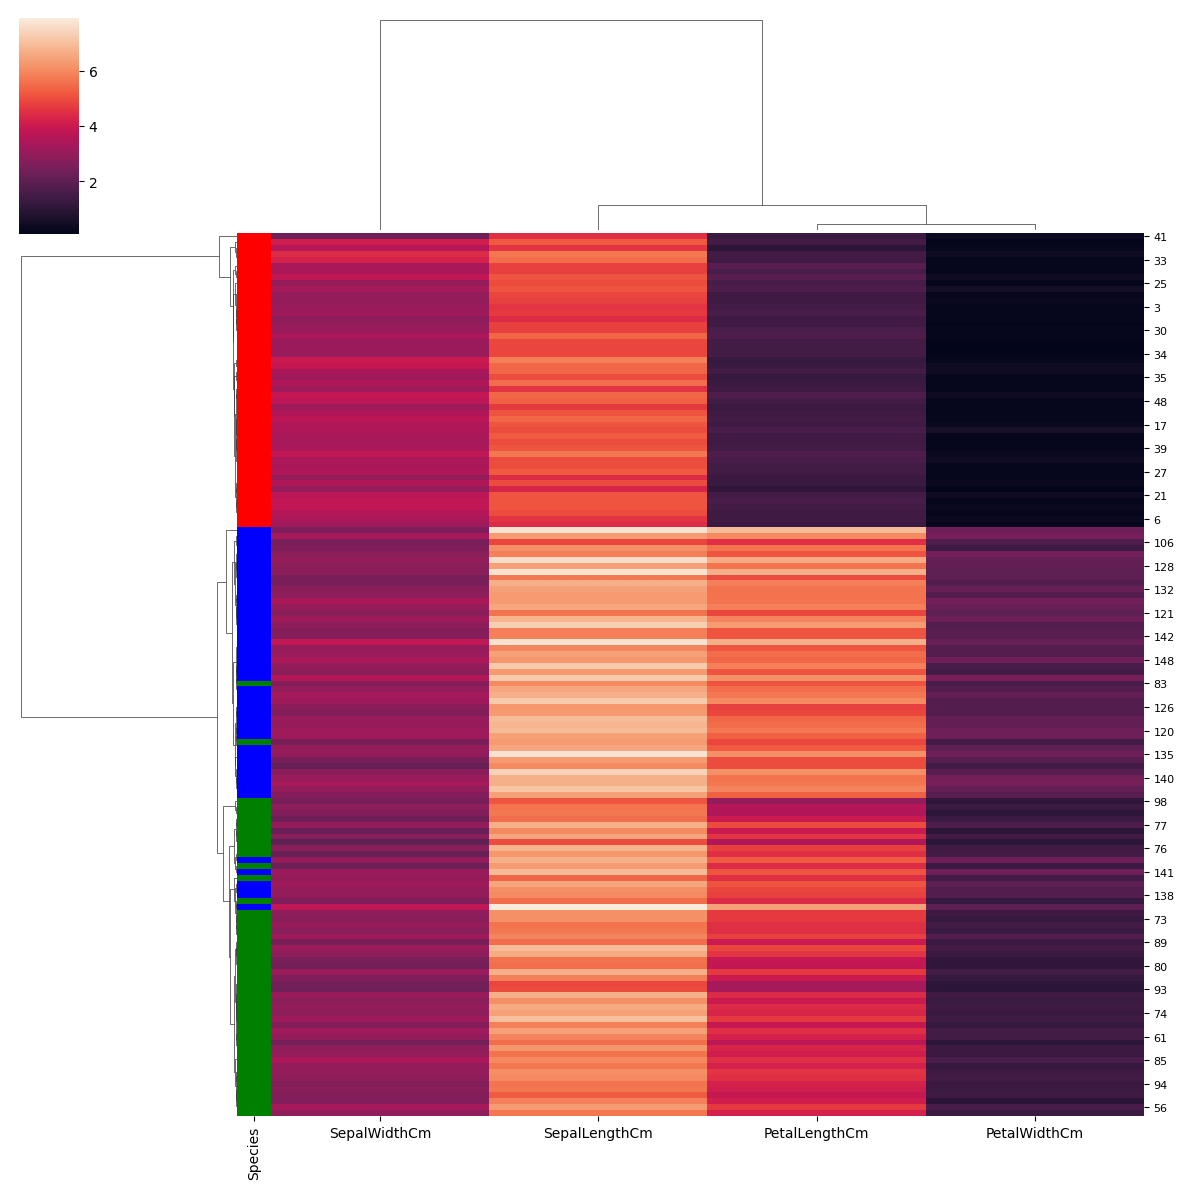

In [10]:
# cluster map (dandogram and tree)
df = data.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
df1 = data.Species
x = dict(zip(df1.unique(),"rgb"))
row_colors = df1.map(x)
cg = sns.clustermap(df,row_colors=row_colors,figsize=(12,12),metric="correlation")
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(),rotation=0,size=8)
plt.show()

<a id="7"></a> <br>
## Inset Plots (Plotly)
* If you do not understand the code check my plotly tutorial.

In [11]:
# trace1 is line plot
# go: graph object
trace1 = go.Scatter(
    x=df.index,
    y=df.SepalLengthCm,
    mode = "markers",
    xaxis='x2',
    yaxis='y2',
    name = "SepalLengthCm",
    marker = dict(color = 'rgba(0, 112, 20, 0.8)'),
)

# trace2 is histogram
trace2 = go.Histogram(
    x=df.SepalLengthCm,
    opacity=0.75,
    name = "Sepal Length(Cm)",
    marker=dict(color='rgba(10, 200, 250, 0.6)'))

# add trace1 and trace2
data = [trace1, trace2]
layout = go.Layout(
    xaxis2=dict(
        domain=[0.7, 1],
        anchor='y2',        
    ),
    yaxis2=dict(
        domain=[0.6, 0.95],
        anchor='x2',
    ),
    title = ' Sepal Length(Cm) Histogram and Scatter Plot'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

<a id="8"></a> <br>
## Basic 3D Scatter Plot (Plotly)
* import data again to avoid confusion
* go.Scatter3d: 3D scatter
* We will plot iris setosa and iris virginica classes according to their Sepal Length(x), Sepal Width(y), and Petal Length(z).

In [12]:
# import data again
data = pd.read_csv('/kaggle/input/iris/Iris.csv')
# data of iris setosa
iris_setosa = data[data.Species == "Iris-setosa"]
# # data of iris virginica
iris_virginica = data[data.Species == "Iris-virginica"]

# trace1 = iris setosa
trace1 = go.Scatter3d(
    x=iris_setosa.SepalLengthCm,
    y=iris_setosa.SepalWidthCm,
    z=iris_setosa.PetalLengthCm,
    mode='markers',
    name="iris_setosa",
    marker=dict(
        color='rgb(217, 100, 100)',
        size=12,
        line=dict(
            color='rgb(255, 255, 255)',
            width=0.1
        )
    )
)
# trace2 iris virginica
trace2 = go.Scatter3d(
    x=iris_virginica.SepalLengthCm,
    y=iris_virginica.SepalWidthCm,
    z=iris_virginica.PetalLengthCm,
    mode='markers',
    name="iris_virginica",
    marker=dict(
        color='rgb(54, 170, 127)',
        size=12,
        line=dict(
            color='rgb(204, 204, 204)',
            width=0.1
        )
    )
)
data = [trace1,trace2]
layout=go.Layout(
    title='3D iris_setosa and iris_virginica',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig=go.Figure(data=data, layout=layout)
iplot(fig)